<a href="https://colab.research.google.com/github/Ganapati-nk/Loan_Approval_Decline_Model_Using_ANN/blob/main/Loan_Approval_Decline_Model_Using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1025]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [1026]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")



In [1027]:
print(f"Shape of train data is {train.shape}")

Shape of train data is (10000, 55)


In [1028]:
train.columns

Index(['DEALER ID', 'APPLICATION LOGIN DATE', 'HDB BRANCH NAME',
       'HDB BRANCH STATE', 'FIRST NAME', 'MIDDLE NAME', 'LAST NAME', 'mobile',
       'AADHAR VERIFIED', 'Cibil Score', 'MOBILE VERIFICATION', 'DEALER NAME',
       'TOTAL ASSET COST', 'ASSET CTG', 'ASSET MODEL NO', 'APPLIED AMOUNT',
       'PRIMARY ASSET MAKE', 'Primary Asset Model No',
       'Personal Email Address', 'MARITAL STATUS', 'GENDER', 'DOB', 'AGE',
       'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 'EMPLOYER NAME', 'EMPLOYER TYPE',
       'Pan Name', 'name', 'vpa', 'upi_name', 'Phone Social Premium.a23games',
       'Phone Social Premium.amazon', 'Phone Social Premium.byjus',
       'Phone Social Premium.flipkart', 'Phone Social Premium.housing',
       'Phone Social Premium.indiamart', 'Phone Social Premium.instagram',
       'Phone Social Premium.isWABusiness',
       'Phone Social Premium.jeevansaathi', 'Phone Social Premium.jiomart',
       'Phone Social Premium.microsoft', 'Phone Social Premium.my11',
       

In [1029]:
train.isnull().sum()/len(train)

,0
DEALER ID,0.0000
APPLICATION LOGIN DATE,0.0000
HDB BRANCH NAME,0.0001
HDB BRANCH STATE,0.0854
FIRST NAME,0.0000
MIDDLE NAME,0.7145
LAST NAME,0.0681
mobile,0.0000
AADHAR VERIFIED,0.0000
Cibil Score,0.4297


In [1030]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER ID                            10000 non-null  int64  
 1   APPLICATION LOGIN DATE               10000 non-null  object 
 2   HDB BRANCH NAME                      9999 non-null   object 
 3   HDB BRANCH STATE                     9146 non-null   object 
 4   FIRST NAME                           10000 non-null  object 
 5   MIDDLE NAME                          2855 non-null   object 
 6   LAST NAME                            9319 non-null   object 
 7   mobile                               10000 non-null  int64  
 8   AADHAR VERIFIED                      10000 non-null  object 
 9   Cibil Score                          5703 non-null   object 
 10  MOBILE VERIFICATION                  10000 non-null  bool   
 11  DEALER NAME                  

In [1031]:
train=train.drop_duplicates()

# DEALER ID

In [1032]:
train['DEALER ID']

,DEALER ID
0,106989
1,108975
2,111004
3,192020
4,55095
...,...
9995,105101
9996,85054
9997,53710
9998,89240


In [1033]:
train['DEALER ID'].nunique()

2416

In [1034]:
train

,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,...,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,106989,07/20/2022,DELHI-SF,DELHI,SUNIL,NaN,CHANDER,9210574080,NO,726,...,0.0,0.0,1.0,NaN,NaN,0.0,5324.0,67.222222,High,APPROVED
1,108975,07/28/2022,PATNA-SF,BIHAR,AMRIT,NaN,KUMAR,8877987018,NO,NaN,...,0.0,0.0,0.0,NaN,NaN,0.0,1998.0,100.000000,High,APPROVED
2,111004,07/15/2022,DARJEELING-SF,WEST BENGAL,ANIMESH,NaN,THAPA,8910862135,NO,737,...,0.0,0.0,0.0,NaN,NaN,0.0,-1.0,-1.000000,Low,APPROVED
3,192020,07/04/22,SAHARANPUR-SF,UTTAR PRADESH,ADITYA,NaN,SINGH,9758428017,NO,713,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,72.777778,High,APPROVED
4,55095,07/15/2022,MODASA-SF,GUJARAT,PARMAR,HARESHBHAI,AMRUTBHAI,9687028486,NO,669,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,68.095238,High,DECLINED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,105101,07/11/22,FARRUKHABAD-SF,UTTAR PRADESH,AJAY,NaN,NARESH,8400644964,NO,NaN,...,0.0,1.0,1.0,NaN,NaN,0.0,-1.0,60.576923,Medium,APPROVED
9996,85054,07/04/22,BHAGALPUR-SF,BIHAR,SURESH,KUMAR,PRASAD,9708883564,NO,NaN,...,0.0,0.0,0.0,0.0,NaN,0.0,1998.0,71.078431,High,APPROVED
9997,53710,07/10/22,LUDHIANA-SF,PUNJAB,SANJAY,NaN,AAGAN,9888532016,NO,NaN,...,0.0,0.0,0.0,1.0,NaN,0.0,1988.0,100.000000,Medium,APPROVED
9998,89240,07/29/2022,MEERUT-SF,UTTAR PRADESH,SANJAY,NaN,SINGH,8923338426,NO,NaN,...,0.0,0.0,0.0,NaN,NaN,0.0,1096.0,-1.000000,Low,APPROVED


# APPLICATION LOGIN DATE

In [1035]:
train['APPLICATION LOGIN DATE']

,APPLICATION LOGIN DATE
0,07/20/2022
1,07/28/2022
2,07/15/2022
3,07/04/22
4,07/15/2022
...,...
9995,07/11/22
9996,07/04/22
9997,07/10/22
9998,07/29/2022


In [1036]:
train['APPLICATION LOGIN DATE'].str.split("/", expand=True)[2].value_counts()


,count
2,
2022,6455
22,3536


In [1037]:
import re

def convert_date_format(date_string):
    # Regular expression patterns
    short_year_pattern = r"(\d{2})/(\d{2})/(\d{2})"
    long_year_pattern = r"(\d{2})/(\d{2})/(\d{4})"

    # Check if the date string is already in the long year format
    if re.match(long_year_pattern, date_string):
        return date_string  # No change needed

    # Otherwise, convert from short year format to long year format
    def replace(match):
        month, day, year = match.groups()
        year = "20" + year  # Assuming the year is in 2000s
        return f"{month}/{day}/{year}"

    # Apply conversion
    return re.sub(short_year_pattern, replace, date_string)


In [1038]:
train['APPLICATION LOGIN DATE']=train['APPLICATION LOGIN DATE'].apply(convert_date_format)

In [1039]:
train['APPLICATION LOGIN DATE'].str.split("/", expand=True)[2].value_counts()

,count
2,
2022,9991


In [1040]:
train['APPLICATION LOGIN DATE']=pd.to_datetime(train['APPLICATION LOGIN DATE'])

In [1041]:
train['year'] = train['APPLICATION LOGIN DATE'].dt.year
train['month'] = train['APPLICATION LOGIN DATE'].dt.month
train['day'] = train['APPLICATION LOGIN DATE'].dt.day
train.drop('APPLICATION LOGIN DATE', axis=1, inplace=True)

In [1042]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9991 entries, 0 to 9999
Data columns (total 57 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER ID                            9991 non-null   int64  
 1   HDB BRANCH NAME                      9990 non-null   object 
 2   HDB BRANCH STATE                     9138 non-null   object 
 3   FIRST NAME                           9991 non-null   object 
 4   MIDDLE NAME                          2853 non-null   object 
 5   LAST NAME                            9310 non-null   object 
 6   mobile                               9991 non-null   int64  
 7   AADHAR VERIFIED                      9991 non-null   object 
 8   Cibil Score                          5699 non-null   object 
 9   MOBILE VERIFICATION                  9991 non-null   bool   
 10  DEALER NAME                          9987 non-null   object 
 11  TOTAL ASSET COST                   

# HDB BRANCH NAME

In [1043]:
train['HDB BRANCH NAME'].value_counts()

,count
HDB BRANCH NAME,
NOIDA-SF,306
DELHI-SF,238
HYDERABAD-SF,210
DEHRADUN-SF,200
BANGALORE-SF,147
...,...
PHULPUR-SF,1
JALPAIGURI-SF,1
UDAIPUR-SF,1


In [1044]:
train[train['HDB BRANCH NAME'].isnull()]

,DEALER ID,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,...,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status,year,month,day
2418,195581,NaN,MADHYA PRADESH,ARJUN,NaN,PATEL,9103047854,NO,NaN,True,...,1.0,NaN,0.0,625.0,-1.0,Medium,APPROVED,2022,7,4


In [1045]:
train = train.dropna(subset=['HDB BRANCH NAME'])


In [1046]:
train.shape

(9990, 57)

# HDB BRANCH STATE

In [1047]:
train['HDB BRANCH STATE'].isnull().sum()

853

In [1048]:
train['HDB BRANCH STATE'].value_counts()

,count
HDB BRANCH STATE,
UTTAR PRADESH,1979
BIHAR,818
HARYANA,618
MADHYA PRADESH,605
MAHARASHTRA,531
DELHI,509
TAMIL NADU,500
RAJASTHAN,452
JHARKHAND,381


In [1049]:
train['HDB BRANCH STATE'].fillna("NOT-KNOWN",inplace=True)

In [1050]:
train['HDB BRANCH STATE'].isnull().sum()

0

In [1051]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [1052]:
ohe_encoder1 = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')


# FIRST NAME


In [1053]:
train['FIRST NAME'].isnull().sum()

0

In [1054]:
train['FIRST NAME'].value_counts()

,count
FIRST NAME,
MOHD,201
MOHAMMAD,149
RAHUL,65
SUNIL,61
RAM,56
...,...
SHAHIDA,1
RIBBUL,1
INTEJAR,1


<h5>NAME doesnt add any value while predictions we are going to drop First Name column</h5>

In [1055]:
train.drop('FIRST NAME',axis=1,inplace=True)

# MIDDLE NAME

In [1056]:
train['MIDDLE NAME'].isnull().sum()

7137

In [1057]:
train.drop('MIDDLE NAME',axis=1,inplace=True)

# LAST NAME

In [1058]:
train['LAST NAME'].isnull().sum()

681

In [1059]:
train['LAST NAME'].value_counts()


,count
LAST NAME,
SINGH,874
KUMAR,716
YADAV,185
KHAN,173
RAM,160
...,...
SHAQIB,1
HANWTE,1
MMANJEGOWDA,1


In [1060]:
train.drop('LAST NAME',axis=1,inplace=True)

# HDB BRANCH NAME

In [1061]:
len(train['HDB BRANCH NAME'].unique())

542

In [1062]:
train['HDB BRANCH NAME'].value_counts()

,count
HDB BRANCH NAME,
NOIDA-SF,306
DELHI-SF,238
HYDERABAD-SF,210
DEHRADUN-SF,200
BANGALORE-SF,147
...,...
PHULPUR-SF,1
JALPAIGURI-SF,1
UDAIPUR-SF,1


In [1063]:
train.drop('HDB BRANCH NAME',axis=1,inplace=True)

# mobile

In [1064]:
train['mobile'].isnull().sum()

0

In [1065]:
train['mobile'].value_counts()

,count
mobile,
9771931048,4
8590213895,4
9813642304,4
8470999891,3
9883872142,3
...,...
8800231095,1
9599348541,1
7873414506,1


In [1066]:
train[train['mobile']==9813642304]

,DEALER ID,HDB BRANCH STATE,mobile,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,DEALER NAME,TOTAL ASSET COST,ASSET CTG,ASSET MODEL NO,...,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status,year,month,day
2425,72223,HARYANA,9813642304,NO,NaN,True,MRM AUTOS PVT LTD VIDYA NAGAR,NaN,NaN,145941,...,1.0,NaN,0.0,-1.0,76.818182,Medium,DECLINED,2022,7,12
3773,72223,HARYANA,9813642304,NO,NaN,True,MRM AUTOS PVT LTD VIDYA NAGAR,NaN,NaN,145941,...,1.0,NaN,0.0,-1.0,85.000000,Medium,DECLINED,2022,7,12
8014,72223,HARYANA,9813642304,NO,NaN,True,MRM AUTOS PVT LTD VIDYA NAGAR,NaN,NaN,145942,...,1.0,NaN,0.0,-1.0,76.818182,Medium,DECLINED,2022,7,12
9885,72223,HARYANA,9813642304,NO,NaN,True,MRM AUTOS PVT LTD VIDYA NAGAR,NaN,NaN,145942,...,1.0,NaN,0.0,-1.0,76.818182,Medium,DECLINED,2022,7,12


In [1067]:
train=train.drop_duplicates()


In [1068]:
# We will drop Mobile Number Column as it is Almost unique for each person and doesnt add that much value
train.drop('mobile',axis=1,inplace=True)

# AADHAR VERIFIED

In [1069]:
train['AADHAR VERIFIED'].value_counts()

,count
AADHAR VERIFIED,
NO,9990


In [1070]:
# We will drop AADHAR VERIFIED column it contains only one values and it doesnt add any value to prediction
train.drop('AADHAR VERIFIED',axis=1,inplace=True)

# Cibil Score

In [1071]:
# Percentage of Missing values
train['Cibil Score'].isnull().sum()/len(train)

0.42952952952952955

In [1072]:
def Cibil_Score(row):
    if (row =='NO RESPONSE') or (row == "-"):
        return 0
    else:
        return float(row)

train['Cibil Score']=train['Cibil Score'].apply(Cibil_Score)

In [1073]:
train['Cibil Score'].fillna(0, inplace=True)

In [1074]:
train[train['Cibil Score'].isnull()]

,DEALER ID,HDB BRANCH STATE,Cibil Score,MOBILE VERIFICATION,DEALER NAME,TOTAL ASSET COST,ASSET CTG,ASSET MODEL NO,APPLIED AMOUNT,PRIMARY ASSET MAKE,...,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status,year,month,day


# MOBILE VERIFICATION

In [1075]:
# percentage of values of people did mobile verification
train['MOBILE VERIFICATION'].value_counts()/len(train)


,count
MOBILE VERIFICATION,
True,1.0


In [1076]:
# We will drop this column as it contains the Single value
train.drop('MOBILE VERIFICATION',axis=1,inplace=True)

# DEALER NAME

In [1077]:
train['DEALER NAME']

,DEALER NAME
0,V D AUTO WHEELS CHHOTIAL
1,CHANDAN AUTOMOBILES 259 KGS TOWER
2,KN VISION 53HILL CART ROAD
3,MAHADEV AUTOMOBILES MANGLAUR
4,DWARKESH AUTO SHAMLAJI ROAD
...,...
9995,GUPTA AUTO DEALERS BARHPUR
9996,RAMESHWARAM ENTERPRISES DR R P ROAD
9997,SHREE DADU AUTOS P L GANDHI NGR
9998,SHREE SHIV SHAKTI AUTOMOTIVE RORKRD


In [1078]:
train[train['DEALER NAME'].isnull()]

,DEALER ID,HDB BRANCH STATE,Cibil Score,DEALER NAME,TOTAL ASSET COST,ASSET CTG,ASSET MODEL NO,APPLIED AMOUNT,PRIMARY ASSET MAKE,Primary Asset Model No,...,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status,year,month,day
108,201737,NOT-KNOWN,0.0,NaN,NaN,NaN,183085,113602,TVS MOTOR CO,RAIDER 125 DISC BSVI,...,NaN,NaN,0.0,1998.0,72.222222,High,APPROVED,2022,7,19
1443,201871,NOT-KNOWN,0.0,NaN,NaN,NaN,198311,85000,AMO ELECTRIC,FIESTY EV,...,0.0,NaN,0.0,912.0,-1.000000,Low,DECLINED,2022,7,21
3395,201747,NOT-KNOWN,0.0,NaN,NaN,NaN,155304,99000,HERO MOTORS,MAESTRO EDGE 110 ALOY WHEEL FI BSVI,...,NaN,NaN,0.0,458.0,-1.000000,Medium,DECLINED,2022,7,18
5989,201839,NOT-KNOWN,0.0,NaN,NaN,NaN,139542,65981,HONDA MOTORS,SHINE DRUM BSVI,...,0.0,NaN,0.0,2524.0,-1.000000,High,DECLINED,2022,7,16


In [1079]:
train[train['DEALER ID']==106989]


,DEALER ID,HDB BRANCH STATE,Cibil Score,DEALER NAME,TOTAL ASSET COST,ASSET CTG,ASSET MODEL NO,APPLIED AMOUNT,PRIMARY ASSET MAKE,Primary Asset Model No,...,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status,year,month,day
0,106989,DELHI,726.0,V D AUTO WHEELS CHHOTIAL,95041.0,MCEXA,139542,85000,HONDA MOTORS,SHINE DRUM BSVI,...,NaN,NaN,0.0,5324.0,67.222222,High,APPROVED,2022,7,20
596,106989,DELHI,683.0,V D AUTO WHEELS CHHOTIAL,NaN,NaN,124650,92000,HONDA MOTORS,ACTIVA 125 DRUM(BSVI),...,NaN,NaN,0.0,2312.0,100.000000,High,DECLINED,2022,7,8
2517,106989,DELHI,0.0,V D AUTO WHEELS CHHOTIAL,NaN,NaN,143240,90000,HONDA MOTORS,ACTIVA 6G DLX BSVI,...,NaN,NaN,0.0,853.0,-1.000000,Low,APPROVED,2022,7,31
2955,106989,DELHI,620.0,V D AUTO WHEELS CHHOTIAL,NaN,NaN,134123,80000,HONDA MOTORS,ACTIVA 6G DLX,...,NaN,NaN,0.0,1998.0,89.444444,High,DECLINED,2022,7,10
3166,106989,DELHI,768.0,V D AUTO WHEELS CHHOTIAL,128081.0,MCPRA,140210,99900,HONDA MOTORS,CB UNICORN 160 BSVI,...,NaN,NaN,0.0,2312.0,92.307692,High,APPROVED,2022,7,31
4700,106989,DELHI,0.0,V D AUTO WHEELS CHHOTIAL,95528.0,SCECA,143240,90000,HONDA MOTORS,ACTIVA 6G DLX BSVI,...,NaN,NaN,0.0,790.0,83.333333,Medium,APPROVED,2022,7,4
4874,106989,DELHI,716.0,V D AUTO WHEELS CHHOTIAL,NaN,NaN,143240,90000,HONDA MOTORS,ACTIVA 6G DLX BSVI,...,1.0,NaN,0.0,2312.0,90.909091,High,APPROVED,2022,7,3
5615,106989,DELHI,0.0,V D AUTO WHEELS CHHOTIAL,NaN,NaN,124648,99500,HONDA MOTORS,ACTIVA 125 DISC(BSVI),...,NaN,NaN,0.0,1998.0,83.333333,High,DECLINED,2022,7,28
6524,106989,DELHI,653.0,V D AUTO WHEELS CHHOTIAL,NaN,NaN,124650,93000,HONDA MOTORS,ACTIVA 125 DRUM(BSVI),...,1.0,NaN,0.0,468.0,50.000000,High,DECLINED,2022,7,3
7156,106989,DELHI,546.0,V D AUTO WHEELS CHHOTIAL,NaN,NaN,134123,80000,HONDA MOTORS,ACTIVA 6G DLX,...,NaN,NaN,NaN,118.0,23.529412,Low,DECLINED,2022,7,21


In [1080]:
# As we already have DEALER ID we will drop DEALER NAME
train.drop('DEALER NAME',axis=1,inplace=True)

# TOTAL ASSET COST

In [1081]:
train['TOTAL ASSET COST']

,TOTAL ASSET COST
0,95041.0
1,NaN
2,119436.0
3,87000.0
4,NaN
...,...
9995,88970.0
9996,120000.0
9997,89929.0
9998,89340.0


In [1082]:
train['TOTAL ASSET COST'].isnull().sum()/len(train)
# 50% of values are null

0.5104104104104105

<Axes: ylabel='TOTAL ASSET COST'>

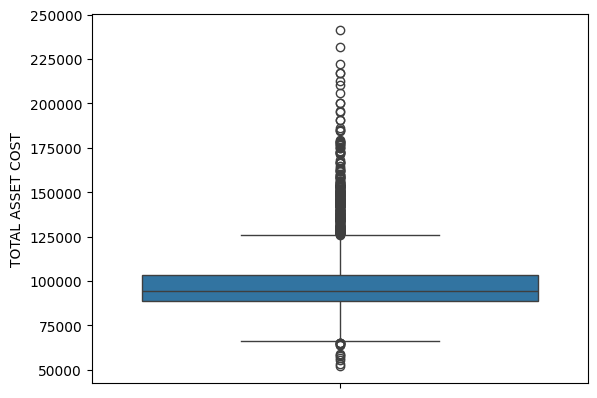

In [1083]:
sns.boxplot(train['TOTAL ASSET COST'])

In [1084]:
# As this is a important column we need to impute using appropriate method
from sklearn.impute import SimpleImputer
imputer1=SimpleImputer(strategy='median')
train['TOTAL ASSET COST']=imputer1.fit_transform(train[['TOTAL ASSET COST']])

# ASSET CTG

In [1085]:
train['ASSET CTG'].value_counts()

,count
ASSET CTG,
MCECA,1820
SCECA,1227
MCEXA,1186
SCEXA,264
MCPRA,126
MCECB,69
MOECA,67
MCECC,46
MCEXB,28


In [1086]:
# 50% of the Values are Missing
train['ASSET CTG'].isnull().sum()/len(train)

0.5104104104104105

In [1087]:
train.drop('ASSET CTG',axis=1,inplace=True)


# ASSET MODEL NO

In [1088]:
train['ASSET MODEL NO']


,ASSET MODEL NO
0,139542
1,140208
2,160001
3,160832
4,174641
...,...
9995,160832
9996,183085
9997,143240
9998,160832


In [1089]:
train['ASSET MODEL NO'].isnull().sum()

0

# APPLIED AMOUNT

In [1090]:
train['APPLIED AMOUNT'].mean()

91788.50900900901

In [1091]:
train['APPLIED AMOUNT'].min()

10400

In [1092]:
train['APPLIED AMOUNT'].max()


1420000

In [1093]:
train['APPLIED AMOUNT'].isnull().sum()

0

# PRIMARY ASSET MAKE

In [1094]:
train['PRIMARY ASSET MAKE']

,PRIMARY ASSET MAKE
0,HONDA MOTORS
1,HERO MOTORS
2,TVS MOTOR CO
3,HERO MOTORS
4,HONDA MOTORS
...,...
9995,HERO MOTORS
9996,TVS MOTOR CO
9997,HONDA MOTORS
9998,HERO MOTORS


In [1095]:
len(train['PRIMARY ASSET MAKE'].unique())


17

In [1096]:
train['PRIMARY ASSET MAKE'].isnull().sum()


0

In [1097]:
train["PRIMARY ASSET MAKE"].value_counts()

,count
PRIMARY ASSET MAKE,
HERO MOTORS,3616
HONDA MOTORS,3257
TVS MOTOR CO,1413
BAJAJ AUTO INDIA,746
SUZUKI MOTORCYCLE,483
YAMAHA MOTOR,224
AMO ELECTRIC,68
OKAYA ELECTRIC,49
OKINAWA ELECTRIC,26


In [1098]:
ohe_encoder2 = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')


# Primary Asset Model No

In [1099]:
train['Primary Asset Model No']

,Primary Asset Model No
0,SHINE DRUM BSVI
1,SPLENDOR PLUS SELF DRUM BSVI I3S
2,TVS NTORQ SUPER SQUAD EDITION BSVI
3,SPLENDOR+ BLK ACCT SS DRUM I3S BSVI
4,DIO STD BSVI
...,...
9995,SPLENDOR+ BLK ACCT SS DRUM I3S BSVI
9996,RAIDER 125 DISC BSVI
9997,ACTIVA 6G DLX BSVI
9998,SPLENDOR+ BLK ACCT SS DRUM I3S BSVI


In [1100]:
train["Primary Asset Model No"].isnull().sum()

0

In [1101]:
train["Primary Asset Model No"].nunique()

267

In [1102]:
train.drop('Primary Asset Model No',axis=1,inplace=True)

# Personal Email Address

In [1103]:
train['Personal Email Address']

,Personal Email Address
0,SUNILSEHRAWAT7355@GMAIL.COM
1,NULL@GMAIL.COM
2,CHETTRIDIKSHA@GMAIL.COM
3,ADITYA98@GAMIL.COM
4,PARMARHARESHBHAI1989@GMAIL.COM
...,...
9995,AJAYDEVSHAKYA@GMAIL.COM
9996,SURESHWISHKARMA356@GMAIL.COM
9997,SANJAY@GMAIL.COM
9998,NOMAIL@GMAIL.COM


In [1104]:
train["Personal Email Address"].isnull().sum()

0

In [1105]:
train["Personal Email Address"].value_counts()

,count
Personal Email Address,
NULL@GMAIL.COM,932
NOMAIL@GMAIL.COM,475
NULL123@GMAIL.COM,168
NOMAIL@NOMAIL.COM,136
NUL@GMAIL.COM,106
...,...
PRADEEP123@GMAIL.COM,1
PRINCEKR1454@GMAIL.COM,1
RAJESH1988@GMAIL.COM,1


In [1106]:
# We drop Personal Email Address column
train.drop('Personal Email Address',axis=1,inplace=True)

# MARITAL STATUS

In [1107]:
# % of Null Values
train['MARITAL STATUS'].isnull().sum()/len(train)

0.488988988988989

In [1108]:
train['MARITAL STATUS'].unique()

array(['Married', nan, 'Single'], dtype=object)

In [1109]:
train['MARITAL STATUS'].value_counts()/len(train['MARITAL STATUS'])*100

,count
MARITAL STATUS,
Married,38.368368
Single,12.732733


In [1110]:
#Encode
train['MARITAL STATUS'].fillna("NOT-KNOWN", inplace=True)

In [1111]:
ohe_encoder3 = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')


# GENDER


In [1112]:
train['GENDER'].value_counts()/len(train)

,count
GENDER,
Male,0.840741
Female,0.159259


In [1113]:
train['GENDER'].isnull().sum()

0

In [1114]:
ohe_encoder4 = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')


# DOB

In [1115]:
train['DOB']

,DOB
0,1041978
1,1011997
2,9081999
3,3071998
4,5071989
...,...
9995,12042000
9996,2101971
9997,1011983
9998,19121970


In [1116]:
train['DOB'].isnull().sum()

0

In [1117]:
# we can drop DOB column as we have age
train.drop('DOB',axis=1,inplace=True)

# AGE

In [1118]:
train['AGE']

,AGE
0,44
1,25
2,22
3,24
4,33
...,...
9995,22
9996,50
9997,39
9998,51


In [1119]:
train['AGE'].isnull().sum()

0

In [1120]:
train['AGE'].min()


0

In [1121]:
train['AGE'].max()


79

# ADDRESS TYPE

In [1122]:
train['ADDRESS TYPE']

,ADDRESS TYPE
0,Parental
1,NaN
2,Self/Spouse Owned
3,Parental
4,NaN
...,...
9995,Parental
9996,Self/Spouse Owned
9997,Rented
9998,Self/Spouse Owned


In [1123]:
train['ADDRESS TYPE'].unique()

array(['Parental', nan, 'Self/Spouse Owned', 'Rented', 'RESIDENCE',
       'PARENT OWNED-HOUSE', 'OWNED-PENTHOUSE', 'Company Provided',
       'OWNDED-FLAT', 'OWNED-BUNGLOW', 'OWNED-ROWHOUSE',
       'PARENT OWNED-FLAT', 'RENTED-ROWHOUSE'], dtype=object)

In [1124]:
train['ADDRESS TYPE'].isnull().sum()/len(train)


0.33103103103103104

In [1125]:
# Impute
train['ADDRESS TYPE'].fillna("NOT-KNOWN", inplace=True)


In [1126]:
ohe_encoder5 = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')


# EMPLOY CONSTITUTION

In [1127]:
train['EMPLOY CONSTITUTION']

,EMPLOY CONSTITUTION
0,SALARIED
1,NaN
2,SELF-EMPLOYED
3,SELF-EMPLOYED
4,NaN
...,...
9995,SALARIED
9996,SELF-EMPLOYED
9997,SELF-EMPLOYED
9998,SELF-EMPLOYED


In [1128]:
train['EMPLOY CONSTITUTION'].isnull().sum()/len(train)


0.4993993993993994

In [1129]:
train['EMPLOY CONSTITUTION'].unique()

array(['SALARIED', nan, 'SELF-EMPLOYED'], dtype=object)

In [1130]:
# Impute
train['EMPLOY CONSTITUTION'].fillna("NOT-KNOWN", inplace=True)


In [1131]:
# Encode
ohe_encoder6 = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')


# EMPLOYER NAME

In [1132]:
train['EMPLOYER NAME']

,EMPLOYER NAME
0,sehrawat spare parts
1,NaN
2,Thapas shop
3,agriculture farming
4,NaN
...,...
9995,GROWFAST ORGANIC DIAMAOND PVT LTD
9996,Raj Ayurved centre
9997,Sanjay karyana store
9998,SANJAY MILK DARY


In [1133]:
train['EMPLOYER NAME'].isnull().sum()/len(train)

0.5006006006006006

In [1134]:
train['EMPLOYER NAME'].nunique()

3693

In [1135]:
# Drop
train.drop('EMPLOYER NAME',axis=1,inplace=True)

# EMPLOYER TYPE

In [1136]:
train['EMPLOYER TYPE']

,EMPLOYER TYPE
0,SALARIED
1,NaN
2,SELF-EMPLOYED
3,SELF-EMPLOYED
4,NaN
...,...
9995,SALARIED
9996,SELF-EMPLOYED
9997,SELF-EMPLOYED
9998,SELF-EMPLOYED


In [1137]:
train['EMPLOYER TYPE'].isnull().sum()/len(train)

0.4993993993993994

In [1138]:
train[['EMPLOYER TYPE',"EMPLOY CONSTITUTION"]]

,EMPLOYER TYPE,EMPLOY CONSTITUTION
0,SALARIED,SALARIED
1,NaN,NOT-KNOWN
2,SELF-EMPLOYED,SELF-EMPLOYED
3,SELF-EMPLOYED,SELF-EMPLOYED
4,NaN,NOT-KNOWN
...,...,...
9995,SALARIED,SALARIED
9996,SELF-EMPLOYED,SELF-EMPLOYED
9997,SELF-EMPLOYED,SELF-EMPLOYED
9998,SELF-EMPLOYED,SELF-EMPLOYED


In [1139]:
train.drop("EMPLOYER TYPE",axis=1,inplace=True)

# Pan Name

In [1140]:
train['Pan Name']

,Pan Name
0,SUNIL KUMAR
1,AMRIT KUMAR
2,ANIMESH THAPA
3,ADITYA KUMAR
4,HARESHBHAI AMRUTBHAI PARMAR
...,...
9995,AJAY DEV
9996,SURESH KUMAR VISHWAKARMA
9997,SANJAY AAGAN
9998,SANJAY KUMAR


In [1141]:
train.drop("Pan Name",axis=1,inplace=True)

# name

In [1142]:
train['name']

,name
0,SUNIL CHANDER
1,AMRIT KUMAR
2,ANIMESH THAPA
3,ADITYA SINGH
4,PARMAR HARESHBHAI AMRUTBHAI
...,...
9995,AJAY NARESH
9996,SURESH KUMAR PRASAD
9997,SANJAY AAGAN
9998,SANJAY SINGH


In [1143]:
train.drop("name",axis=1,inplace=True)

# vpa

In [1144]:
train['vpa']

,vpa
0,ABFSPAY
1,OKSBI
2,NaN
3,PAYTM
4,IKWIK
...,...
9995,OKICICI
9996,YBL
9997,OKSBI
9998,NaN


In [1145]:
train['vpa'].isnull().sum()

2782

In [1146]:
# Drop
train.drop('vpa',axis=1,inplace=True)

# upi_name

In [1147]:
train['upi_name']

,upi_name
0,SUNIL KUMAR
1,Amrit Kumar
2,NaN
3,Aditya Kumar
4,HARESHBHAI AMRUTBHAI
...,...
9995,AJAY DEV
9996,MR SURESH KUMAR VISHWAKARMA
9997,SANJAY AAGAN SO GOBINDA AAGAN
9998,NaN


In [1148]:
train.drop("upi_name",axis=1,inplace=True)

# Phone Social Premium.a23games

In [1149]:
train['Phone Social Premium.a23games'].unique()

array([nan,  0.])

In [1150]:
# We drop as we have only 0
train.drop("Phone Social Premium.a23games",axis=1,inplace=True)

# Phone Social Premium.amazon

In [1151]:
train['Phone Social Premium.amazon']

,Phone Social Premium.amazon
0,1.0
1,1.0
2,0.0
3,0.0
4,1.0
...,...
9995,1.0
9996,1.0
9997,0.0
9998,0.0


In [1152]:
train['Phone Social Premium.amazon'].isnull().sum()/len(train)

0.1916916916916917

In [1153]:
train['Phone Social Premium.amazon'].unique()

array([ 1.,  0., nan])

In [1154]:
train['Phone Social Premium.amazon'].isnull().sum()/len(train)

0.1916916916916917

In [1155]:
# FIll Missing Values with 0
train['Phone Social Premium.amazon'].fillna(0, inplace=True)

# Phone Social Premium.byjus

In [1156]:
train['Phone Social Premium.byjus']

,Phone Social Premium.byjus
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
9995,1.0
9996,0.0
9997,1.0
9998,0.0


In [1157]:
train['Phone Social Premium.byjus'].isnull().sum()/len(train)

0.1948948948948949

In [1158]:
train['Phone Social Premium.byjus'].unique()

array([ 0.,  1., nan])

In [1159]:
# FIll Missing Values with 0
train['Phone Social Premium.byjus'].fillna(0, inplace=True)


In [1160]:
train['Phone Social Premium.byjus'].isnull().sum()/len(train)

0.0

# Phone Social Premium.flipkart

In [1161]:
train['Phone Social Premium.flipkart']

,Phone Social Premium.flipkart
0,1.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
9995,0.0
9996,1.0
9997,0.0
9998,0.0


In [1162]:
train['Phone Social Premium.flipkart'].isnull().sum()/len(train)

0.18328328328328328

In [1163]:
train['Phone Social Premium.flipkart'].unique()

array([ 1.,  0., nan])

In [1164]:
# FIll Missing Values with 0
train['Phone Social Premium.flipkart'].fillna(0, inplace=True)

In [1165]:
train['Phone Social Premium.flipkart'].isnull().sum()/len(train)

0.0

# Phone Social Premium.housing

In [1166]:
train['Phone Social Premium.housing']

,Phone Social Premium.housing
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
9995,0.0
9996,0.0
9997,0.0
9998,0.0


In [1167]:
train['Phone Social Premium.housing'].isnull().sum()/len(train)

0.17767767767767767

In [1168]:
train['Phone Social Premium.housing'].unique()

array([ 0.,  1., nan])

In [1169]:
# FIll Missing Values with 0
train['Phone Social Premium.housing'].fillna(0, inplace=True)

# Phone Social Premium.indiamart

In [1170]:
train['Phone Social Premium.indiamart']

,Phone Social Premium.indiamart
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
9995,1.0
9996,1.0
9997,1.0
9998,1.0


In [1171]:
train['Phone Social Premium.indiamart'].isnull().sum()/len(train)


0.17757757757757758

In [1172]:
# FIll Missing Values with 0
train['Phone Social Premium.indiamart'].fillna(0, inplace=True)

In [1173]:
train['Phone Social Premium.indiamart'].isnull().sum()/len(train)


0.0

# Phone Social Premium.instagram

In [1174]:
train['Phone Social Premium.instagram']

,Phone Social Premium.instagram
0,NaN
1,NaN
2,NaN
3,1.0
4,1.0
...,...
9995,1.0
9996,0.0
9997,NaN
9998,NaN


In [1175]:
train['Phone Social Premium.instagram'].isnull().sum()/len(train)

0.6634634634634634

In [1176]:
# FIll Missing Values with 0
train['Phone Social Premium.instagram'].fillna(0, inplace=True)

In [1177]:
train['Phone Social Premium.instagram'].isnull().sum()/len(train)

0.0

# Phone Social Premium.isWABusiness

In [1178]:
train['Phone Social Premium.isWABusiness']

,Phone Social Premium.isWABusiness
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
9995,NaN
9996,0.0
9997,0.0
9998,NaN


In [1179]:
train['Phone Social Premium.isWABusiness'].unique()

array([nan,  0.,  1.])

In [1180]:
train['Phone Social Premium.isWABusiness'].isnull().sum()/len(train)

0.8429429429429429

In [1181]:
train.drop('Phone Social Premium.isWABusiness',axis=1,inplace=True)

# Phone Social Premium.jeevansaathi

In [1182]:
train['Phone Social Premium.jeevansaathi']

,Phone Social Premium.jeevansaathi
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
9995,0.0
9996,0.0
9997,0.0
9998,0.0


In [1183]:
train['Phone Social Premium.jeevansaathi'].isnull().sum()/len(train)

0.182982982982983

In [1184]:
train['Phone Social Premium.jeevansaathi'].unique()

array([ 0.,  1., nan])

In [1185]:
# FIll Missing Values with 0
train['Phone Social Premium.jeevansaathi'].fillna(0, inplace=True)

In [1186]:
train['Phone Social Premium.jeevansaathi'].isnull().sum()/len(train)

0.0

# Phone Social Premium.jiomart

In [1187]:
train['Phone Social Premium.jiomart']

,Phone Social Premium.jiomart
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
9995,NaN
9996,NaN
9997,NaN
9998,NaN


In [1188]:
train['Phone Social Premium.jiomart'].isnull().sum()/len(train)

0.958958958958959

In [1189]:
train.drop('Phone Social Premium.jiomart',axis=1,inplace=True)

# Phone Social Premium.microsoft

In [1190]:
train['Phone Social Premium.microsoft']

,Phone Social Premium.microsoft
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
9995,1.0
9996,0.0
9997,0.0
9998,0.0


In [1191]:
train['Phone Social Premium.microsoft'].isnull().sum()/len(train)

0.18728728728728727

In [1192]:
# FIll Missing Values with 0
train['Phone Social Premium.microsoft'].fillna(0, inplace=True)

In [1193]:
train['Phone Social Premium.microsoft'].isnull().sum()/len(train)

0.0

# Phone Social Premium.my11

In [1194]:
train['Phone Social Premium.my11']

,Phone Social Premium.my11
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
9995,NaN
9996,NaN
9997,NaN
9998,NaN


In [1195]:
train['Phone Social Premium.my11'].isnull().sum()/len(train)

0.9997997997997998

In [1196]:
train.drop('Phone Social Premium.my11',axis=1,inplace=True)

# Phone Social Premium.paytm

In [1197]:
train['Phone Social Premium.paytm']

,Phone Social Premium.paytm
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
9995,1.0
9996,1.0
9997,1.0
9998,0.0


In [1198]:
train['Phone Social Premium.paytm'].isnull().sum()/len(train)

0.17577577577577577

In [1199]:
# FIll Missing Values with 0
train['Phone Social Premium.paytm'].fillna(0, inplace=True)

In [1200]:
train['Phone Social Premium.paytm'].isnull().sum()/len(train)

0.0

# Phone Social Premium.rummycircle

In [1201]:
train['Phone Social Premium.rummycircle']

,Phone Social Premium.rummycircle
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
9995,NaN
9996,NaN
9997,NaN
9998,NaN


In [1202]:
train['Phone Social Premium.rummycircle'].isnull().sum()/len(train)


0.9998998998998999

In [1203]:
train.drop('Phone Social Premium.rummycircle',axis=1,inplace=True)

# Phone Social Premium.shaadi

In [1204]:
train['Phone Social Premium.shaadi']

,Phone Social Premium.shaadi
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
9995,0.0
9996,0.0
9997,0.0
9998,0.0


In [1205]:
train['Phone Social Premium.shaadi'].isnull().sum()/len(train)


0.17797797797797799

In [1206]:
# FIll Missing Values with 0
train['Phone Social Premium.shaadi'].fillna(0, inplace=True)

In [1207]:
train['Phone Social Premium.shaadi'].isnull().sum()/len(train)


0.0

# Phone Social Premium.skype

In [1208]:
train['Phone Social Premium.skype']

,Phone Social Premium.skype
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
9995,1.0
9996,0.0
9997,0.0
9998,0.0


In [1209]:
train['Phone Social Premium.skype'].isnull().sum()/len(train)


0.1785785785785786

In [1210]:
# FIll Missing Values with 0
train['Phone Social Premium.skype'].fillna(0, inplace=True)

In [1211]:
train['Phone Social Premium.skype'].isnull().sum()/len(train)


0.0

# Phone Social Premium.toi

In [1212]:
train['Phone Social Premium.toi']

,Phone Social Premium.toi
0,1.0
1,0.0
2,0.0
3,1.0
4,1.0
...,...
9995,1.0
9996,0.0
9997,0.0
9998,0.0


In [1213]:
train['Phone Social Premium.toi'].isnull().sum()/len(train)


0.1942942942942943

In [1214]:
# FIll Missing Values with 0
train['Phone Social Premium.toi'].fillna(0, inplace=True)

In [1215]:
train['Phone Social Premium.toi'].isnull().sum()/len(train)


0.0

# Phone Social Premium.whatsapp

In [1216]:
train['Phone Social Premium.whatsapp']

,Phone Social Premium.whatsapp
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
9995,NaN
9996,0.0
9997,1.0
9998,NaN


In [1217]:
train['Phone Social Premium.whatsapp'].isnull().sum()/len(train)


0.8429429429429429

In [1218]:
train.drop('Phone Social Premium.whatsapp',axis=1,inplace=True)

# Phone Social Premium.yatra

In [1219]:
train['Phone Social Premium.yatra']

,Phone Social Premium.yatra
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
9995,NaN
9996,NaN
9997,NaN
9998,NaN


In [1220]:
train['Phone Social Premium.yatra'].isnull().sum()/len(train)


0.9990990990990991

In [1221]:
train.drop('Phone Social Premium.yatra',axis=1,inplace=True)

# Phone Social Premium.zoho

In [1222]:
train['Phone Social Premium.zoho']

,Phone Social Premium.zoho
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
9995,0.0
9996,0.0
9997,0.0
9998,0.0


In [1223]:
train['Phone Social Premium.zoho'].isnull().sum()/len(train)


0.17827827827827827

In [1224]:
# FIll Missing Values with 0
train['Phone Social Premium.zoho'].fillna(0, inplace=True)

In [1225]:
train['Phone Social Premium.zoho'].isnull().sum()/len(train)


0.0

# phone_digitalage

In [1226]:
train['phone_digitalage']

,phone_digitalage
0,5324.0
1,1998.0
2,-1.0
3,1998.0
4,1998.0
...,...
9995,-1.0
9996,1998.0
9997,1988.0
9998,1096.0


In [1227]:
train['phone_digitalage'].isnull().sum()

4

In [1228]:
imputer2=SimpleImputer(strategy="median")
train['phone_digitalage']=imputer2.fit_transform(train[['phone_digitalage']])

# phone_nameMatchScore

In [1229]:
train['phone_nameMatchScore']

,phone_nameMatchScore
0,67.222222
1,100.000000
2,-1.000000
3,72.777778
4,68.095238
...,...
9995,60.576923
9996,71.078431
9997,100.000000
9998,-1.000000


In [1230]:
train['phone_nameMatchScore'].isnull().sum()

4

In [1231]:
imputer2=SimpleImputer(strategy="median")
train['phone_nameMatchScore']=imputer2.fit_transform(train[['phone_nameMatchScore']])

# phone_phoneFootprintStrengthOverall

In [1232]:
train['phone_phoneFootprintStrengthOverall']


,phone_phoneFootprintStrengthOverall
0,High
1,High
2,Low
3,High
4,High
...,...
9995,Medium
9996,High
9997,Medium
9998,Low


In [1233]:
train['phone_phoneFootprintStrengthOverall'].isnull().sum()

6

In [1234]:
train['phone_phoneFootprintStrengthOverall'].unique()

array(['High', 'Low', 'Medium', 'Very High', nan, 'Very Low'],
      dtype=object)

In [1235]:
imputer3 = SimpleImputer(strategy="most_frequent")
train['phone_phoneFootprintStrengthOverall'] = imputer3.fit_transform(train[['phone_phoneFootprintStrengthOverall']]).ravel()


In [1236]:
train.isnull().sum().sum()

0

In [1237]:
# Encode
ohe_encoder7 = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')


# Application Status

In [1238]:
train['Application Status']

,Application Status
0,APPROVED
1,APPROVED
2,APPROVED
3,APPROVED
4,DECLINED
...,...
9995,APPROVED
9996,APPROVED
9997,APPROVED
9998,APPROVED


In [1239]:
train['Application Status'].isnull().sum()

0

In [1240]:
train.columns

Index(['DEALER ID', 'HDB BRANCH STATE', 'Cibil Score', 'TOTAL ASSET COST',
       'ASSET MODEL NO', 'APPLIED AMOUNT', 'PRIMARY ASSET MAKE',
       'MARITAL STATUS', 'GENDER', 'AGE', 'ADDRESS TYPE',
       'EMPLOY CONSTITUTION', 'Phone Social Premium.amazon',
       'Phone Social Premium.byjus', 'Phone Social Premium.flipkart',
       'Phone Social Premium.housing', 'Phone Social Premium.indiamart',
       'Phone Social Premium.instagram', 'Phone Social Premium.jeevansaathi',
       'Phone Social Premium.microsoft', 'Phone Social Premium.paytm',
       'Phone Social Premium.shaadi', 'Phone Social Premium.skype',
       'Phone Social Premium.toi', 'Phone Social Premium.zoho',
       'phone_digitalage', 'phone_nameMatchScore',
       'phone_phoneFootprintStrengthOverall', 'Application Status', 'year',
       'month', 'day'],
      dtype='object')

In [1241]:
train.isnull().sum()

,0
DEALER ID,0
HDB BRANCH STATE,0
Cibil Score,0
TOTAL ASSET COST,0
ASSET MODEL NO,0
APPLIED AMOUNT,0
PRIMARY ASSET MAKE,0
MARITAL STATUS,0
GENDER,0
AGE,0


In [1242]:
x=train.drop("Application Status",axis=1)
y=train['Application Status']

In [1243]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [1244]:
from sklearn.pipeline import make_pipeline

In [1245]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe1', ohe_encoder1, ['HDB BRANCH STATE']),
        ('ohe2', ohe_encoder2, ['PRIMARY ASSET MAKE']),
        ('ohe3', ohe_encoder3, ['MARITAL STATUS']),
        ('ohe4', ohe_encoder4, ['GENDER']),
        ('ohe5', ohe_encoder5, ['ADDRESS TYPE']),
        ('ohe6', ohe_encoder6, ['EMPLOY CONSTITUTION']),
        ('ohe7', ohe_encoder7, ['phone_phoneFootprintStrengthOverall']),
    ],
    remainder='passthrough'
)

pipeline = make_pipeline(
    preprocessor
    )


In [1246]:
x_train_transformed=pipeline.fit_transform(x_train)
x_test_transformed=pipeline.transform(x_test)

In [1247]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train_transformed)
x_test_scaled=scaler.transform(x_test_transformed)

In [1248]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_transform = label_encoder.fit_transform(y_train)
y_test_transform = label_encoder.transform(y_test)

In [1249]:
y_train_transform=1-y_train_transform
y_test_transform=1-y_test_transform

In [1250]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping


In [1251]:
model=Sequential()
from keras.layers import Dropout

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train_transformed.shape[1],)))
model.add(Dropout(0.2))  # Dropout layer with 50% dropout rate
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Another dropout layer
model.add(Dense(1, activation='sigmoid'))


In [1252]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 128)                 │          10,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,201 (75.00 KB)

 Trainable params: 19,201 (75.00 KB)

 Non-trainable params: 0 (0.00 B)

In [1253]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Metric to monitor
    patience=5,          # Number of epochs to wait before stopping
    restore_best_weights=True  # Restore the best weights at the end of training
)

In [1254]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [1255]:
model.fit(x_train_scaled,y_train_transform,epochs=100,batch_size=32,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7053 - loss: 0.5109 - val_accuracy: 0.8124 - val_loss: 0.3552
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8253 - loss: 0.3478 - val_accuracy: 0.8261 - val_loss: 0.3477
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8205 - loss: 0.3323 - val_accuracy: 0.8249 - val_loss: 0.3456
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8355 - loss: 0.3220 - val_accuracy: 0.8168 - val_loss: 0.3489
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8397 - loss: 0.3143 - val_accuracy: 0.8218 - val_loss: 0.3506
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8363 - loss: 0.3130 - val_accuracy: 0.8130 - val_loss: 0.3537
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8360 - loss: 0.3151 - val_accuracy: 0.8130 - val_loss: 0.3581


In [1256]:
loss,accuracy=model.evaluate(x_test_scaled,y_test_transform)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8174 - loss: 0.3539


In [1257]:
print("Accuracy:", accuracy)
print("Loss:", loss)

Accuracy: 0.8278278112411499
Loss: 0.33892637491226196
